## Data and sampling distributions

### Random sampling and sample bias

- **Sample** - subset from a larger dataset. Can sample with or without replacement

- **Population** - larger data set (or idea of larger set

- **N (n)** - size of the population (sample)

- **Random sampling** - drawing elements into a sample at random

- **Stratified sampling** - dividing the population into strata, sampling randomly from each strata

- **Simple random sample** - sample that results from random sampling without stratification

- **Sample bias** - sample that misrepresents population

#### Bias

Errors produced by the sampling or measurement process

Must distinguish between chance errors and bias errors

If there is a suggestion of bias, often some model has been misspecified, or a variable left out

#### Random selection

Takes time to do it right

#### When does size matter?

Size vs. quality trade-offs

#### Sample mean vs. population mean

$ \bar{x} $ is used to represent mean of a sample

$ \mu $ is used to represent mean of a population

- random sampling is important
- bias is errors because sampling was bad
- data quality is more important than quantity

### Selection bias

- **Bias** - systematic error

- **Data snooping** - hunting through data for something interesting

- **Vast search effort** - bias/nonreproducability from repeated modeling or modeling too many predictor variables

- **Target shuffling** - permutation test of the validity of predictive associations

#### Regression to the mean

Successive measurements, extreme observations are usually followed by more central ones

- to avoid bias: specify a hypothesis, collect data w/ randomization/random sampling principles
- everything else invites bias: repreated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events

### Sampling distribution of a statistic

- **Sample statistic** - metric calculated for a sample

- **Data distribution** - frequency distribution of values in a data set

- **Sampling distribution** - frequency distribution of a sample statistic over many samples or resamples

- **Central limit theorem** - tendency of the sampling distribution to take on a normal shape as sample size rises

- **Standard error** - variability (standard deviation) of a sample statistic over many samples (as opposed to standard deviation, which measures variability of individual *values*)

The distribution of a sample statistic, like the mean, is likely to be more regular/bell-shaped than the distribution of the actual data.

The larger the sample that the statistic is based on, the more this is true.

And the larger the sample, the narrower the distribution of the sample statistic.

The graphs below show the data and three samples:
- a sample of 1,000 values
- a sample of 1,000 means of 5 values
- a sample of 1,000 means of 20 values

The histograms are increasingly compact.

In [1]:
import math, pylab
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

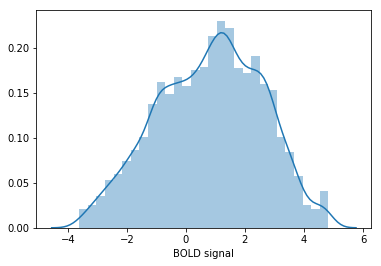

In [2]:
gammas = sns.load_dataset('gammas')
df = gammas.dropna(subset=['BOLD signal'])
sns.distplot(df['BOLD signal'])
# all data

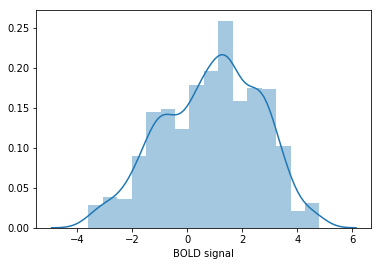

In [3]:
s = df.sample(n=1000, replace=True)
sns.distplot(s['BOLD signal'])
# all data random sample n=1000

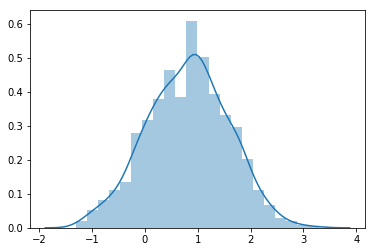

In [4]:
means_of_5 = [ df.sample(n=5)['BOLD signal'].mean() for _ in range(1000) ]
sns.distplot(means_of_5)
# sample of means of 5 values n=1000

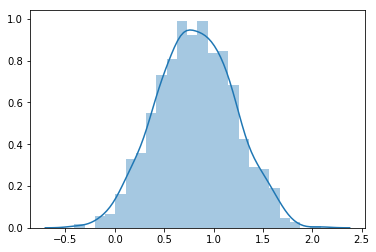

In [5]:
means_of_20 = [ df.sample(n=20)['BOLD signal'].mean() for _ in range(1000) ]
sns.distplot(means_of_20)
# sample of means of 20 values n=1000

#### Central limit theorem

Means drawn from multiple samples will start to resemble the normal distribution, even i the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great.

Allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference (i.e. confidence intervals and hypothesis tests).

Central limit theorem is important in traditional statistics, with lots of hypothesis tests and confidence intervals.

But it's less important in data science.

#### Standard error

Sums up the variability in the sampling distribution for a statistic.

### $ SE = \frac{s}{\sqrt{n}} $

In [6]:
#######
def mean(x):
    return sum(x) / len(x)

def variance(x, sample=True):
    sum_squared_deviations = sum([ (x[i] - mean(x))**2 for i in range(len(x)) ])
    denominator = (len(x) - 1) if sample else len(x)
    return sum_squared_deviations / denominator

def standard_deviation(x):
    return math.sqrt(variance(x))
#######

def standard_error(x):
    return standard_deviation(x) / math.sqrt(len(x))

standard_error([1,2,6])

1.5275252316519468

*Square-root of n = rule*: in order to reduce the standard error by factor of 2, must increase sample size by factor of 4.

In modern statistics, the *bootstrap* resampling proess has become standard way to estimate standard error, as it doesn't have any distributional assumptions (as opposed to the central limit theorem which does).

- frequency distribution of sample statistic tells us how that metric would turn out differently, sample to sample
- sampling distribution can be estimated via the bootstrap, or via formulas relying on central limit theorem
- standard error is key metric summing up variability of a sample statistic

### The bootstrap

**Bootstrap sample** - sample taken with replacement from the observed data set

**Resampling** - taking repeated samples from data; both bootstrap and permutation/shuffling procedures

Basically replicating the first sample a thousand times over, so it's a hypothetical population embodying all the knowledge from the first sample, just larger.

Then drawing samples from this hypothetical population for purpose of estimating a sampling distribution.

In practice we simply sample with replacement.

- Take n samples with replacement
- Use n results to record statistic (e.g. mean)
- Repeat R times
- Use R results to:
 - calculate standard deviation
 - visualize histogram or boxplot
 - find a confidence interval
 

Standard deviation 0    915.540551
dtype: float64


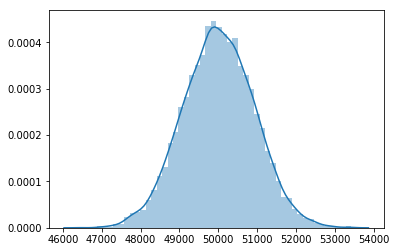

In [7]:
### Bootstrapping a sample statistic (mean)

data = pd.DataFrame(np.random.randint(100000, size=100000))

R = 10000
n = 1000

results = []
for _ in range(R):
    s = data.sample(n=n, replace=True)
    results.append(s.mean())

df = pd.DataFrame(results)
print('Standard deviation', df.std())
sns.distplot(df)

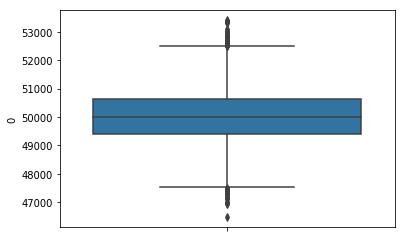

In [8]:
sns.boxplot(y=df[0])

The bootstrap can be used with multivariate data, where whole rows are sampled as units

Classification and regression/decision trees, running multple trees on bootstrap samples and then averaging predictions (or taking a majority vote) is usually better than a single tree

This is called *bagging*, bootstrap aggregating

Note that bootstrap does NOT compensate for small sample size; just informs about how lots of additional samples would behave when drawn from a population like our original sample

Bootstrapping is sometimes referred to as resampling, but resampling usually includes permutations

- bootstrap is sampling with replacement to assess the variability of a sample statistic
- can be applied in variety of circumstances, without lots of math approximations of sampling distributions
- estimate sampling distributions for statistics where no mathematical approximation has been developed
- for predictive models, bagging preforms better than a single model

### Confidence intervals

- **Confidence level** - percentage of confidence intervals, constructed in the same way from the same population, expected to contain the statistic of interest

- **Interval endpoints** - top and bottom of the confidence interval

We often want to predict a range of numbers, not a single *point estimate*. 

Confidence intervals come with confidence levels - e.g. 90% - meaning "this is the interval enclosing the central 90% of the bootstrap sampling distribution of a sample statistic"

An *x%* confidence interval around a sample estimate should, on average, contain similar sample estimates *x%* of the time.



In [9]:
df = df.sort_values(by=0)
df_90_confidence_interval = pd.DataFrame(df[0].values[500:9500])

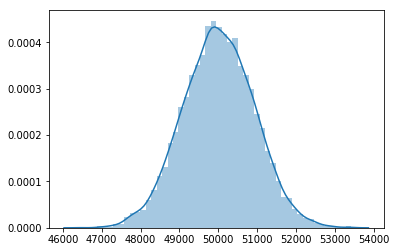

In [10]:
sns.distplot(df)

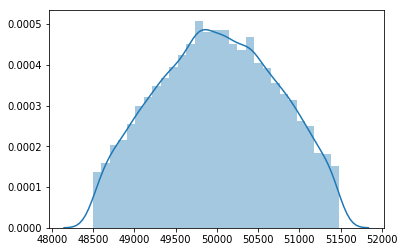

In [11]:
sns.distplot(df_90_confidence_interval)

Using our bootstrapped data set of R=10000 means of n=1000, selected from the population of N=100000

The first graph above shows the full bootstrap distribution

The second shows the 90% confidence interval

This means that 90% of the boostrap statistics were in this interval.

In [12]:
print(df_90_confidence_interval[0].max())
print(df_90_confidence_interval[0].min())

51486.748
48500.153


The interval endpoints were 48,574.312 and 51,557.043.

This means that across ten thousand resamples, each of size 1000, 90% of the time, the statistic we measured (the mean) was in the range of 48.6k to 51.6k.

(The actual mean of the whole population is 50054.12806)

In [13]:
data.mean()

0    49993.73674
dtype: float64

Can use confidence intervals to talk about the potential error in an estimate, or maybe learn if a bigger sample is needed.

- confidence intervals are the typical way to present estimates as an interval range
- the more data you have, the less variable the sample estimate will be
- the lower level of confidence you can tolerate, narrower the confidence level will be
- bootstrap is an effective way to construct confidence intervals

### Normal distribution

- **Error** - difference b/w datapoint and predicted value
- **Standardize/normalize** - subtract the mean, divide by the standard deviation (sd)
- **Z-score** - result of standardizing an individual data point
- **Standard normal** - normal distribution with mean = 0 and sd = 1
- **QQ-plot** - how close a sample distribution is to a normal distribution

Bell-shaped, iconic distribution

A powerful tool in approximating sample statistic distributions

In a normal distribution, 68% of data is within 1 sd of the mean, 95% is within 2 sd, 99.7% is within 3 sd

Also known as *Gaussian distribution*

NOTE: Assuming statistic is normally distributed is a last result, if you can't use bootstrap distributions or other options

In [14]:
def z_scores(x):
    mean_x = mean(x)
    std_x = standard_deviation(x)
    return [(x_i - mean_x) / std_x for x_i in x]

z_scores(df[0].values)[:10]

[-3.8668057338180852,
 -3.3572313633782698,
 -3.3177246479719327,
 -3.3053712901824519,
 -3.2707316448300499,
 -3.1519078528581401,
 -3.121687454686664,
 -3.1114770931821489,
 -3.1064188792190093,
 -3.0642962228837796]

In [15]:
df['col_zscore'] = (df[0] - df[0].mean())/df[0].std()
df['col_zscore'].head(10)

9185   -3.866806
8960   -3.357231
2918   -3.317725
1295   -3.305371
6497   -3.270732
835    -3.151908
6074   -3.121687
3305   -3.111477
2574   -3.106419
5906   -3.064296
Name: col_zscore, dtype: float64

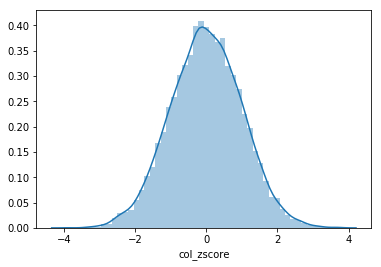

In [16]:
sns.distplot(df['col_zscore'])

QQ-plot determines how close a smaple is to the normal distribution.

Z-score goes on the y-axis, and corresponding quantiles of a normal distribution are on x-axis.

A 45-degree line is drawn down the middle.

IF the points fall roughly on this line, then the sample distribution can be considered close to normal.

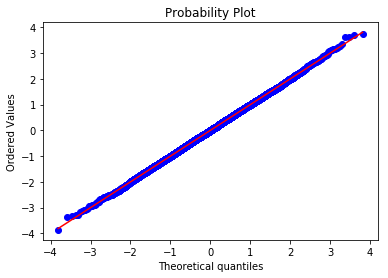

In [17]:
stats.probplot(df['col_zscore'], dist="norm", plot=pylab)
pylab.show()

Based on this we can expect a normal distribution for our sample statistic (R=10000 means of samples of n=1000).

And, we see one.

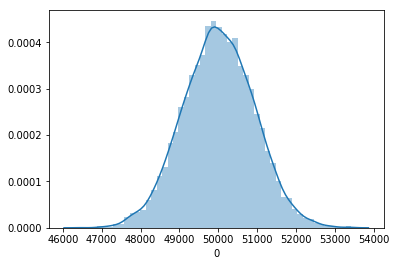

In [18]:
sns.distplot(df[0])

- Normal distribution permits approzimation of uncertainty and variability
- Raw data is typically not normally distributed, *errors* are, as are averages and totals in large samples.
- To convert data to z-scores, subtract the mean of the data and divide by the standard deviation. You can then compare to a normal distribution.

### Long-tailed distributions

- **Tail** - long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency

- **Skew** - where one tail of a distribution is longer than the other

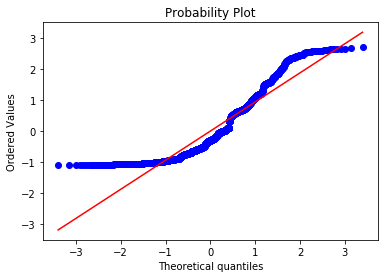

In [19]:
nflx = pdr.get_data_yahoo('NFLX')
nflx_close_z_scores = z_scores(nflx['Close'])
stats.probplot(nflx_close_z_scores, dist="norm", plot=pylab)
pylab.show()

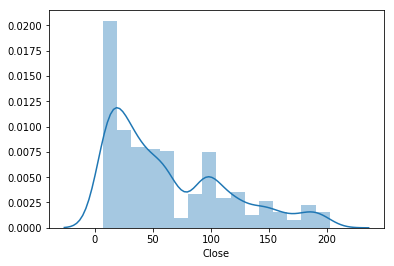

In [20]:
sns.distplot(nflx['Close'])

- most data is not normally distributed
- assuming normal distribution leads to underestimation of extreme events ("black swans")

### Student's t-distribution

Normally-shaped distribution, but thicker and longer on the tails

Used extensivly in depicting distributions of sample statistics

- **n** - sample size

- **degrees of freedom** - allows t-distribution to adjust to different sample sizes, statistics, and number of groups

A number of different statistics can be compared, after normalization, to the t-distribution, to estimate confidence intervals in light of sampling variation

*Degrees of freedom* "chops off" n% of the t-distribution at either end

E.g. if $n$ = sample size, $\bar{x}$ = sample mean, $s$ = sample standard deviation, and $t$ = t-statistic a 90% confidence interval around the sample mean is given by:

### $ \bar{x} \pm t_{n - 1} (.05) \times \frac{s}{n} $

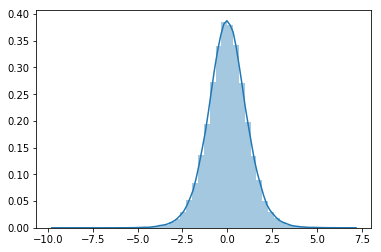

In [21]:
s = np.random.standard_t(10, size=100000)
sns.distplot(s)

- t-distribution is actually a family of distributions resembling the normal distribution, but with thicker tails
- widely used as reference basis for the distribution of sample means, differences b/w two sample means, regression parameters, and more

### Binormial distributions

- **Trial** - event with discrete outcome (e.g. coin flip)

- **Success** - outcome of interest for a trial - aka 1, not 0

- **Binomial** - having only 2 outcomes - aka binary, t/f, y/n, 0/1

- **Binomial trial** - a trial with 2 outcomes - aka bernoulli trial

- **Binomial distribution** - distribution of successes in x trials - aka bernoulli distribution

Binomial distribution is the frequency distribution of number of successes ($x$) in a given number of trials ($n$) with specified probability ($p$) of success in each trial

There is a family of binomial distributions, depending on values of $x$, $n$, and $p$

Mean 5.041
Sd 1.62848732601


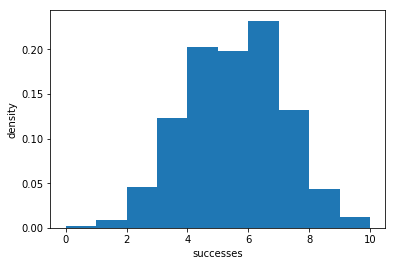

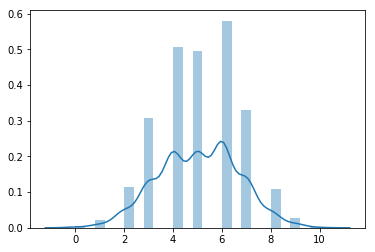

In [22]:
# with numpy.random.binomial
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)
print('Mean', np.mean(s))
print('Sd', np.std(s, ddof=1))
plt.hist(s, bins=10, normed=10)
plt.xlabel("successes")
plt.ylabel("density")
plt.show()
sns.distplot(s)

Mean 4.993
Sd 1.56249556556


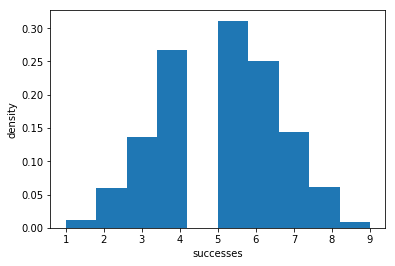

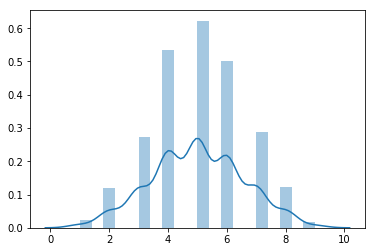

In [23]:
# with scipy.stats
n, p = 10, .5  # number of trials, probability of each trial
binom_sim = stats.binom.rvs(n=n, p=p, size=1000)
print('Mean', np.mean(binom_sim))
print('Sd', np.std(binom_sim, ddof=1))
plt.hist(binom_sim, bins=10, normed=10)
plt.xlabel("successes")
plt.ylabel("density")
plt.show()
sns.distplot(binom_sim)

- binomial outcomes are important since they represent fundamental decisions (do it or don't do it, did it or didn't do it)
- binomial trial is an experiment w/ 2 possible outcomes: 1 with probability $p$, the other with probability $1 - p$
- with large $n$, and provided $p$ is not too close to 0 or 1, binomial distribution can be approximated by the normal distribution